In [2]:
import pandas as pd
from datetime import date
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#this is our google stock price dataset
df = pd.read_csv("google_stock_price.csv")
df_copy = df.copy()
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


<Axes: >

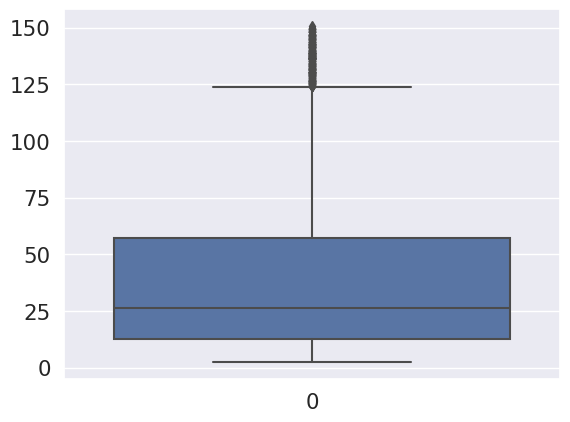

In [191]:
#for this project we'll mainly be looking at the close column
#boxplot of the close column
sns.boxplot(df_copy['Close'])

In [192]:
#statistics of our data
upper_quartile = np.percentile(df_copy['Close'], 75)
upper_quartile
lower_quartile = np.percentile(df_copy['Close'], 25)
iqr =  upper_quartile - lower_quartile
upper_whisker = df_copy[df_copy['Close'] <= upper_quartile + 1.5*iqr].max()
upper_whisker


Date         2023-10-27
Open         127.574997
High         129.550003
Low          123.099998
Close        123.870003
Adj Close    123.870003
Volume       1650832619
dtype: object

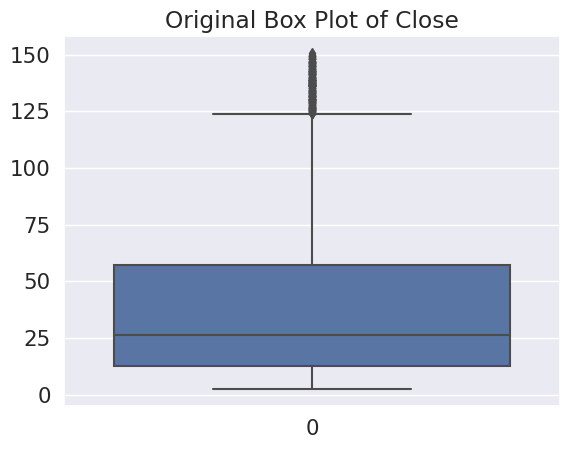

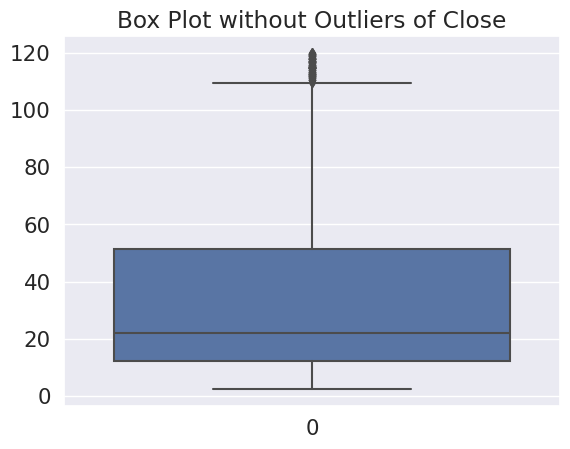

4842

In [193]:
#visualzing outliers and a method to show what it would look like without them
def removal_box_plot(df_copy, column, threshold):
    sns.boxplot(df_copy[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df_copy[df_copy[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 120
 
no_outliers = removal_box_plot(df_copy, 'Close', threshold_value)
count_row = df_copy.shape[0]
count_row


In [194]:
#method for removing outliers from our dataset
def remove_outliers(df_copy, outlier_margin = 0.67):
    Q1 = df_copy["Close"].quantile(0.15)
    Q3  = df_copy["Close"].quantile(0.85)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR)
    print(Q1 - outlier_margin * IQR)
    print(Q3 + outlier_margin * IQR)
    return df_copy[(df_copy["Close"] > (Q1 - outlier_margin * IQR)) & (df_copy["Close"] < (Q3 + outlier_margin * IQR))]
df_copy2 = remove_outliers(df_copy)
count_row = df_copy2.shape[0]
print(df_copy.shape[0], df_copy2.shape[0])


10.693430995941164 88.14062652587887 77.44719552993772
-41.19619000911711
140.03024753093715
4842 4745


In [220]:
#creating a copy of our dataset (without outliers) so we can use it to train both models (LTSM, and RF)
df_copy2=df.copy()

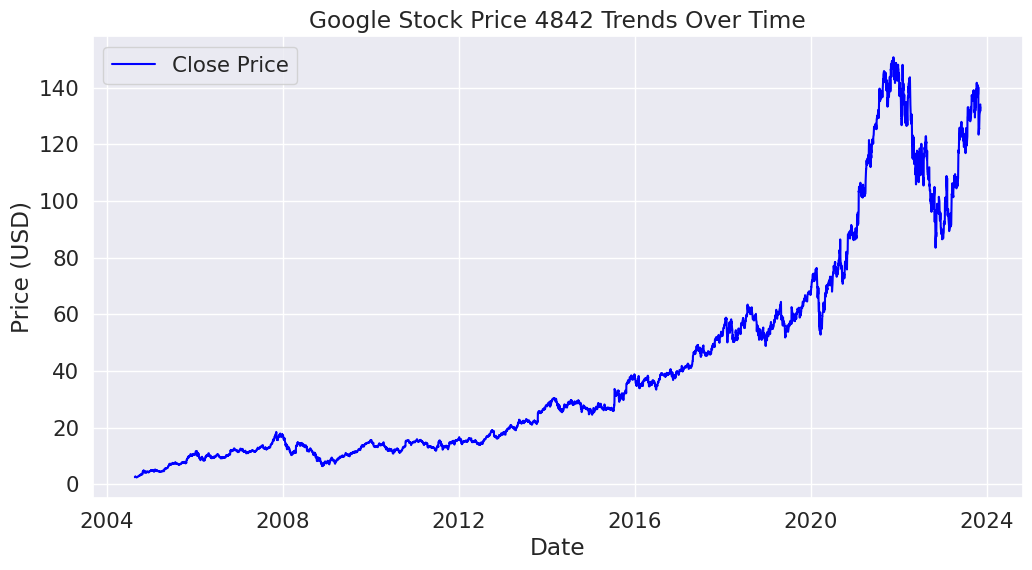

In [196]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Close'], label='Close Price', color='blue')

plt.title('Google Stock Price 4842 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


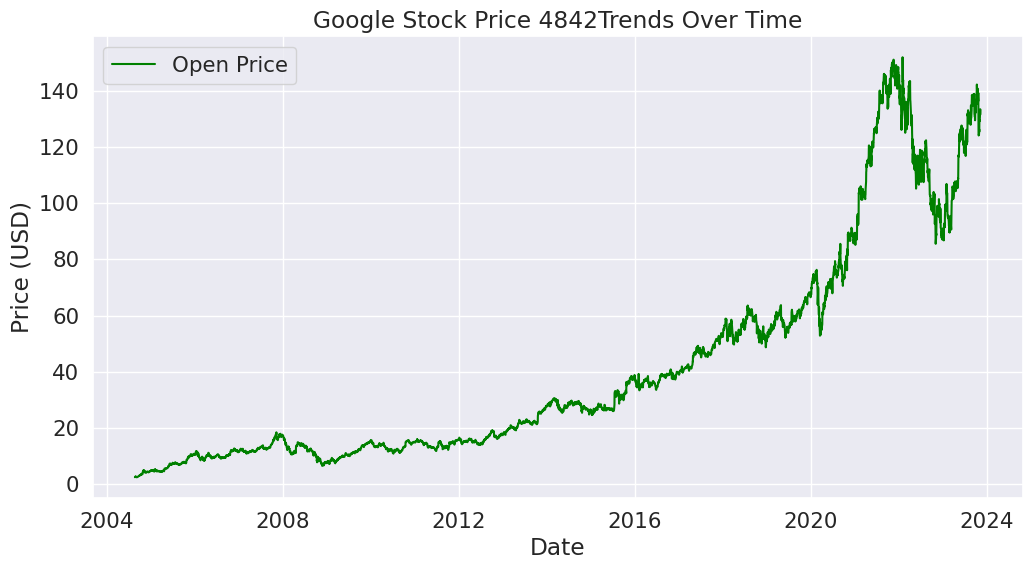

In [197]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Open'], label='Open Price', color='green')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

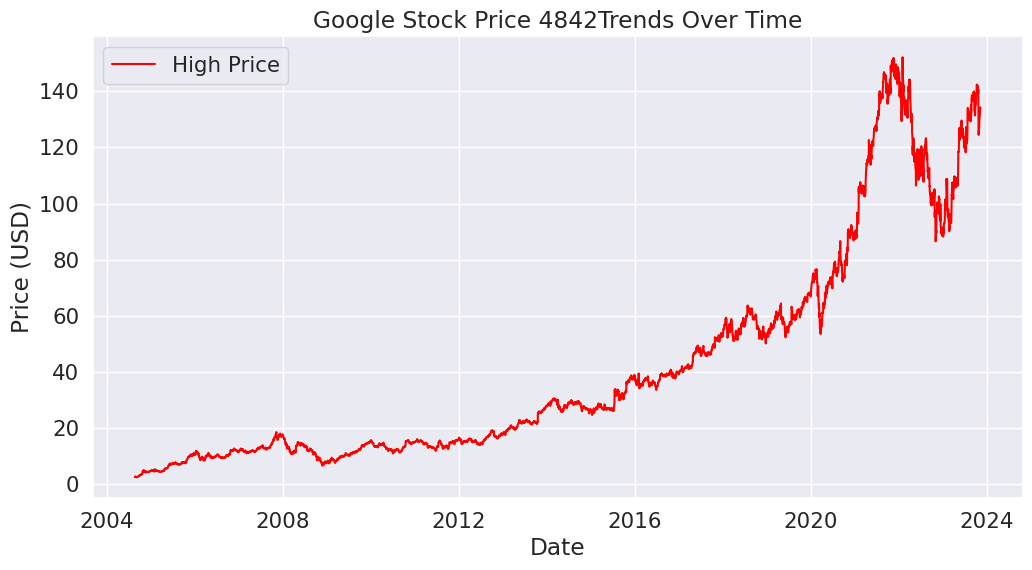

In [198]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['High'], label='High Price', color='red')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

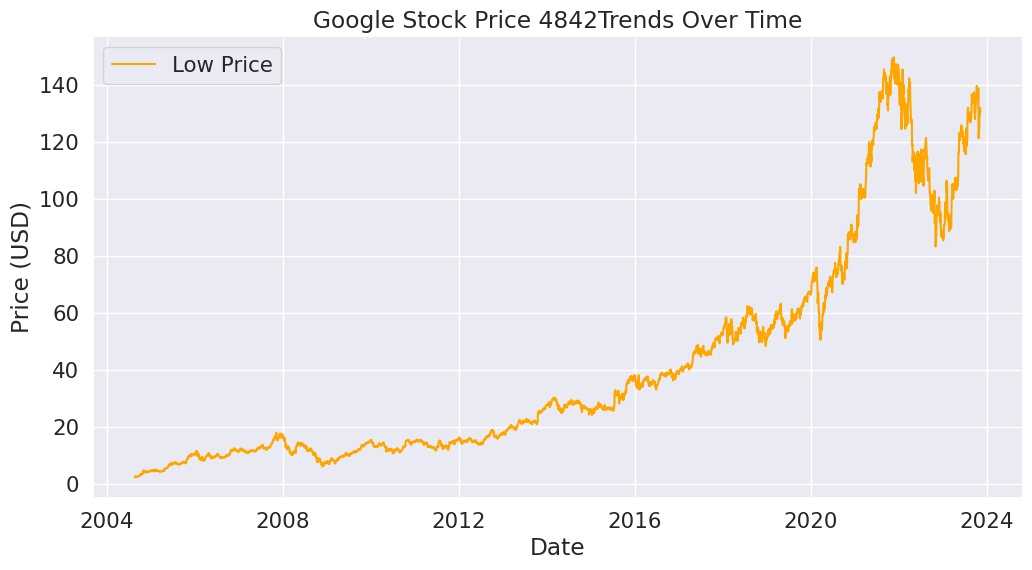

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Low'], label='Low Price', color='orange')

plt.title('Google Stock Price 4842Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

/usr/users/quota/students/2021/zsaleem/miniconda3/envs/csci373/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


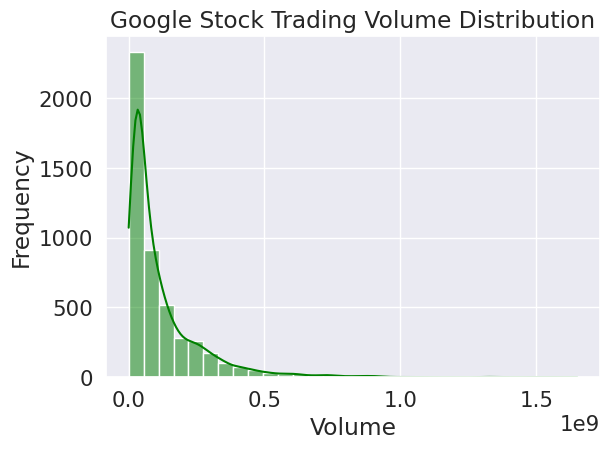

In [200]:
plt.subplot(1, 1, 1)
sns.histplot(df_copy['Volume'], bins=30, kde=True, color='green')
plt.title('Google Stock Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


In [201]:
google_close_iqr = df_copy['Close'].quantile(0.75) - df_copy['Close'].quantile(0.25)
google_close_upper_bound = df_copy['Close'].quantile(0.75) + 1.5 * google_close_iqr

# Identify outliers for Google stock
google_outliers = df_copy[df_copy['Close'] > google_close_upper_bound]

# Print or further analyze the identified outliers
print("Google Stock Outliers:")
print(google_outliers)




Google Stock Outliers:
           Date        Open        High         Low       Close   Adj Close  \
4229 2021-06-08  123.995003  124.724747  123.412003  124.142502  124.142502   
4230 2021-06-09  124.974998  125.250000  124.366501  124.570000  124.570000   
4231 2021-06-10  124.700500  126.163002  124.699997  126.080002  126.080002   
4232 2021-06-11  126.246002  126.349503  124.914497  125.696503  125.696503   
4233 2021-06-14  125.669502  126.411499  125.046997  126.351997  126.351997   
...         ...         ...         ...         ...         ...         ...   
4837 2023-11-06  130.220001  131.559998  129.929993  131.449997  131.449997   
4838 2023-11-07  131.979996  133.279999  131.139999  132.399994  132.399994   
4839 2023-11-08  132.360001  133.539993  132.160004  133.259995  133.259995   
4840 2023-11-09  133.360001  133.960007  131.509995  131.690002  131.690002   
4841 2023-11-10  131.529999  134.270004  130.869995  134.059998  134.059998   

        Volume  
4229  25060

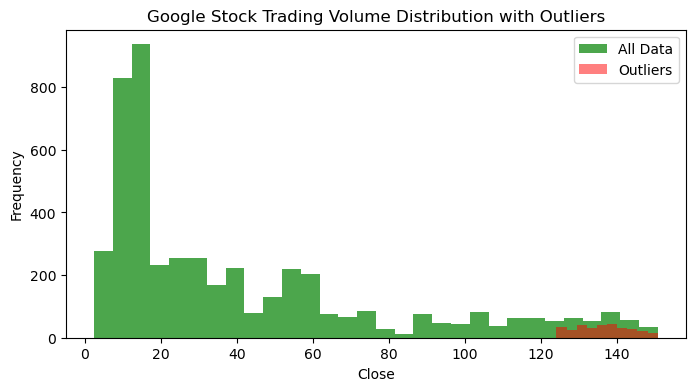

In [40]:
google_close_iqr = df_copy['Close'].quantile(0.75) - df_copy['Close'].quantile(0.25)
google_close_upper_bound = df_copy['Close'].quantile(0.75) + 1.5 * google_close_iqr

# Identify outliers for Google stock
google_outliers = df_copy[df_copy['Close'] > google_close_upper_bound]

plt.figure(figsize=(8, 4))

plt.hist(df_copy['Close'], bins=30, color='green', alpha=0.7, label='All Data')
plt.hist(google_outliers['Close'], bins=10, color='red', alpha=0.5, label='Outliers')
plt.title('Google Stock Trading Volume Distribution with Outliers')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.legend()

plt.show()


Epoch 1/100
121/121 - 1s - loss: 0.0084 - 909ms/epoch - 8ms/step
Epoch 2/100
121/121 - 0s - loss: 3.5951e-05 - 418ms/epoch - 3ms/step
Epoch 3/100
121/121 - 0s - loss: 3.3403e-05 - 365ms/epoch - 3ms/step
Epoch 4/100
121/121 - 0s - loss: 3.2000e-05 - 370ms/epoch - 3ms/step
Epoch 5/100
121/121 - 0s - loss: 3.2277e-05 - 426ms/epoch - 4ms/step
Epoch 6/100
121/121 - 0s - loss: 3.0823e-05 - 370ms/epoch - 3ms/step
Epoch 7/100
121/121 - 0s - loss: 3.0619e-05 - 403ms/epoch - 3ms/step
Epoch 8/100
121/121 - 0s - loss: 3.0175e-05 - 401ms/epoch - 3ms/step
Epoch 9/100
121/121 - 0s - loss: 2.9586e-05 - 385ms/epoch - 3ms/step
Epoch 10/100
121/121 - 0s - loss: 2.8742e-05 - 369ms/epoch - 3ms/step
Epoch 11/100
121/121 - 0s - loss: 2.7902e-05 - 348ms/epoch - 3ms/step
Epoch 12/100
121/121 - 0s - loss: 2.8229e-05 - 360ms/epoch - 3ms/step
Epoch 13/100
121/121 - 0s - loss: 2.7295e-05 - 271ms/epoch - 2ms/step
Epoch 14/100
121/121 - 0s - loss: 2.6717e-05 - 403ms/epoch - 3ms/step
Epoch 15/100
121/121 - 0s - loss:

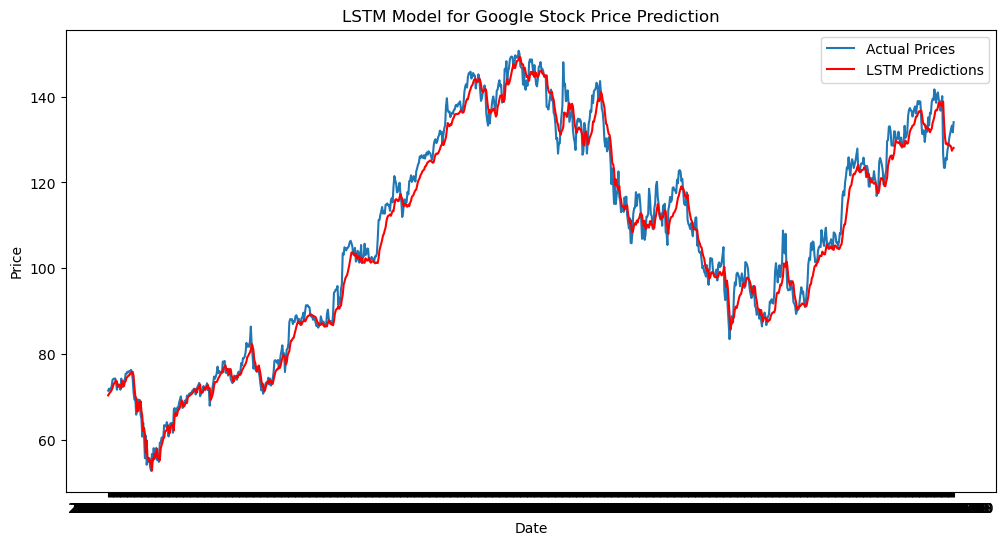

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Select relevant columns and set 'Date' as the index
google_data = df[['Date', 'Close']]
google_data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(google_data.values)

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # Adjust as needed
X, y = create_dataset(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
trainX, testX = X[:train_size], X[train_size:]
trainY, testY = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
trainX = np.expand_dims(trainX, axis=1)
testX = np.expand_dims(testX, axis=1)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, time_steps)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

# Make predictions on the test set
predictions = model.predict(testX)
predictions = scaler.inverse_transform(predictions)

# Invert the scaling for the actual values
actual_values = scaler.inverse_transform(testY.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(actual_values, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(google_data.index[train_size + time_steps:], actual_values, label='Actual Prices')
plt.plot(google_data.index[train_size + time_steps:], predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Model for Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [5]:
#Model 2: Random Forest Classification

data = df

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [6]:
# Adding additional columns

data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

In [7]:

dataset_length = data.shape[0]

split = int(dataset_length * 0.75)
split

3627

In [8]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3627, 4) (1210, 4)
(3627,) (1210,)


In [9]:
#training the model and getting predictions
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
model = clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
y_pred_test=model.predict(X_test)
report = classification_report(y_test, model.predict(X_test))
print(report)

Correct Prediction (%):  48.595041322314046
              precision    recall  f1-score   support

          -1       0.44      0.44      0.44       558
           1       0.52      0.53      0.52       652

    accuracy                           0.49      1210
   macro avg       0.48      0.48      0.48      1210
weighted avg       0.49      0.49      0.49      1210



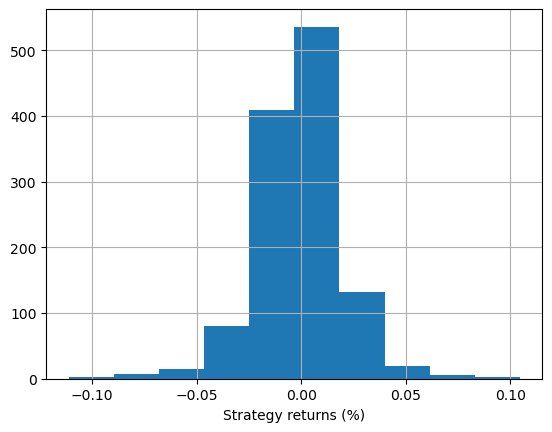

In [10]:
#Plot strategy returns
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')

plt.show()

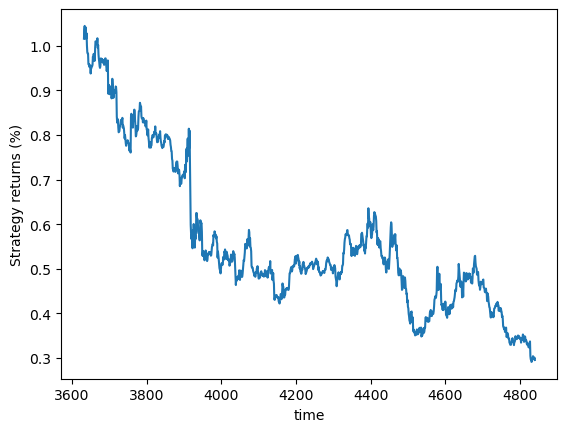

In [11]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.xlabel('time')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)


array([[245, 313],
       [309, 343]])

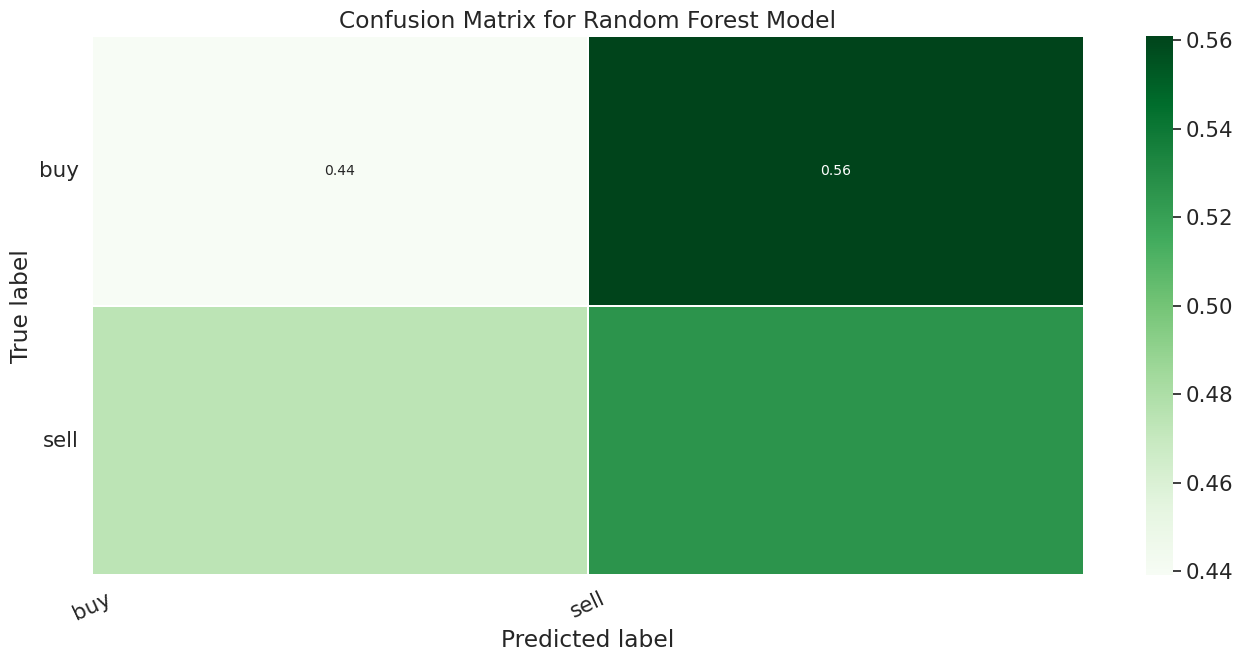

In [13]:
# Get and reshape confusion matrix data\
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['buy', 'sell']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()